In [94]:
#Gerekli kütüphaneler import edildi ve veri setimiz yüklendi
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import os

from warnings import filterwarnings
filterwarnings('ignore')

os.chdir("C:/Users/USER/Desktop/Kodluyoruz")

data= pd.read_csv("hmelq.csv")
data.head()


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
class Information():
    
    def __init__(self,data):
      self.data = data
    def info_data(self):
      print(self.data.head()) 
      print(self.data.info)
      print(self.data.dtypes)
      print(self.data.shape)
      print(self.data.isnull().sum(axis = 0))

class PreProcessing():
    def __init__(self,data):
        self.data = data
    def fill_missing_value(self):
        data=self.data.dropna()

class Visualizer():
    def bar_plot(self,x,y,z = None):
        plt.figure(figsize=(6,5))
        sns.barplot(x=x, y=y, hue=z, data=self.data)
    def scatterplot(self, data1, data2, xlabel=None, ylabel=None):
        plt.figure(figsize=(10,6))
        plt.scatter(data1, data2)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    def histogram(self, data):
        sns.distplot(data)
        plt.show()


In [3]:
#data["bad"]=data["bad"].apply(lambda x : "odendi" if x==1 else "odenmedi")

In [4]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [24]:
#Değişkenlerle ilgili açıklamalar yapıldı

In [25]:
#bad = 1: odeme yapilmamis 0: odeme yapilmis
#loan = talep edilen kredi miktari
#mortdue = mevcut Mortgage borclari
#value = guncel mal-mulk degeri
#reason = DebtCon: kısa süreli borçların uzun süreli ya da süresiz borca dönüştürülmesi(borclarin birlestirilmesi), Homelmp: evin değerini arttırmak için yapılan dekorasyon
#job = meslek durumu
#yoj = mevcut iste gecirilen yil
#derog = baslica ihlal edici, uygunsuz davranis raporlarinin sayisi
#delinq = odenmemis kredi kredi limitinin sayisi
#clage = aylarin icerisindeki en eski kredi limitinin yasi
#ninq = güncel,son kredi sorgusunun sayisi
#clno = kredi limit sayisi
#debtinc = borc gelir orani

In [26]:
#Veri hakkında bilgi edindik

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [5]:
!pip install researchpy
import researchpy as rp

  Using cached researchpy-0.2.3-py3-none-any.whl (10 kB)


In [29]:
#Kategorik değişkenleri daha yakından inceledik.

In [30]:
rp.summary_cat(data[["reason","job"]])

,Variable,Outcome,Count,Percent
0,reason,DebtCon,2371,69.15
1,,HomeImp,1058,30.85
2,job,Other,1431,41.98
3,,ProfEx,767,22.50
4,,Office,569,16.69
5,,Mgr,461,13.52
6,,Self,115,3.37
7,,Sales,66,1.94


In [31]:
#Ozet istatistiğini inceledik

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000
debtinc,2809.0,33.831737,9.061837,0.72,29.14,34.747,38.94,203.312


In [13]:
#Değişkenlerdeki toplam eksik gözlemleri tespit ettik ve ortalamayla doldurduk

In [52]:
data.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [53]:
data.fillna(data.mean(),inplace=True)

In [54]:
data.isnull().sum()

bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq         0
clno         0
debtinc      0
dtype: int64

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00000,16200.000000,23100.000000,89900.000
mortdue,3576.0,74013.907992,42039.367757,2619.00,48577.00000,70009.000000,88029.000000,399550.000
value,3576.0,101076.922759,54371.955751,8800.00,66250.00000,89936.000000,118402.250000,850000.000
yoj,3576.0,8.832644,7.230266,0.00,3.00000,8.000000,12.000000,41.000
derog,3576.0,0.261670,0.811867,0.00,0.00000,0.000000,0.000000,10.000
delinq,3576.0,0.432558,1.043874,0.00,0.00000,0.000000,0.432558,15.000
clage,3576.0,179.832529,84.858509,0.49,118.00000,177.855000,227.100000,1168.230
ninq,3576.0,1.186373,1.653842,0.00,0.00000,1.000000,2.000000,17.000
clno,3576.0,21.507116,9.976568,0.00,15.00000,21.000000,26.000000,71.000
debtinc,3576.0,33.831737,8.031132,0.72,30.68175,33.831737,37.885000,203.312


In [37]:
pd.crosstab(index=data["reason"], columns=data["bad"])

bad,odendi,odenmedi
reason,,
DebtCon,440,1931
HomeImp,244,814


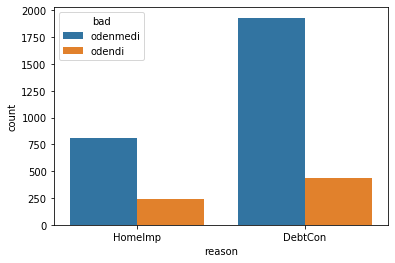

In [19]:
sns.countplot("reason", hue="bad", data=data)

In [20]:
pd.crosstab(index=data["loan"], columns=data["bad"])

bad,odendi,odenmedi
loan,,
1100,1,0
1300,1,0
1500,1,0
1700,1,1
1800,2,0
...,...,...
88900,0,1
89000,0,1
89200,0,1


KeyboardInterrupt: 

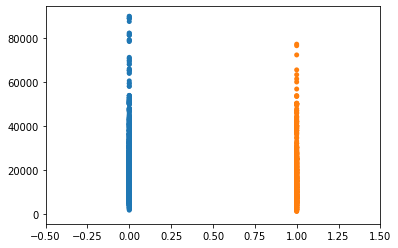

In [21]:
sns.swarmplot(x="bad", y="loan", data=data);

In [ ]:
pd.crosstab(index=data["mortdue"], columns=data["bad"])

In [ ]:
sns.swarmplot(x="bad", y="mortdue", data=data);

In [ ]:
pd.crosstab(index=data["value"], columns=data["bad"])

In [ ]:
sns.swarmplot(x="bad", y="value", data=data);

In [ ]:
pd.crosstab(index=data["job"], columns=data["bad"])

In [ ]:
sns.countplot("job", hue="bad", data=data)

In [171]:
pd.crosstab(index=data["yoj"], columns=data["bad"])

bad,0,1
yoj,,
0.00,213,34
0.10,2,6
0.20,2,1
0.25,0,1
0.30,3,3
...,...,...
33.00,0,2
34.00,0,1
35.00,2,0


C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


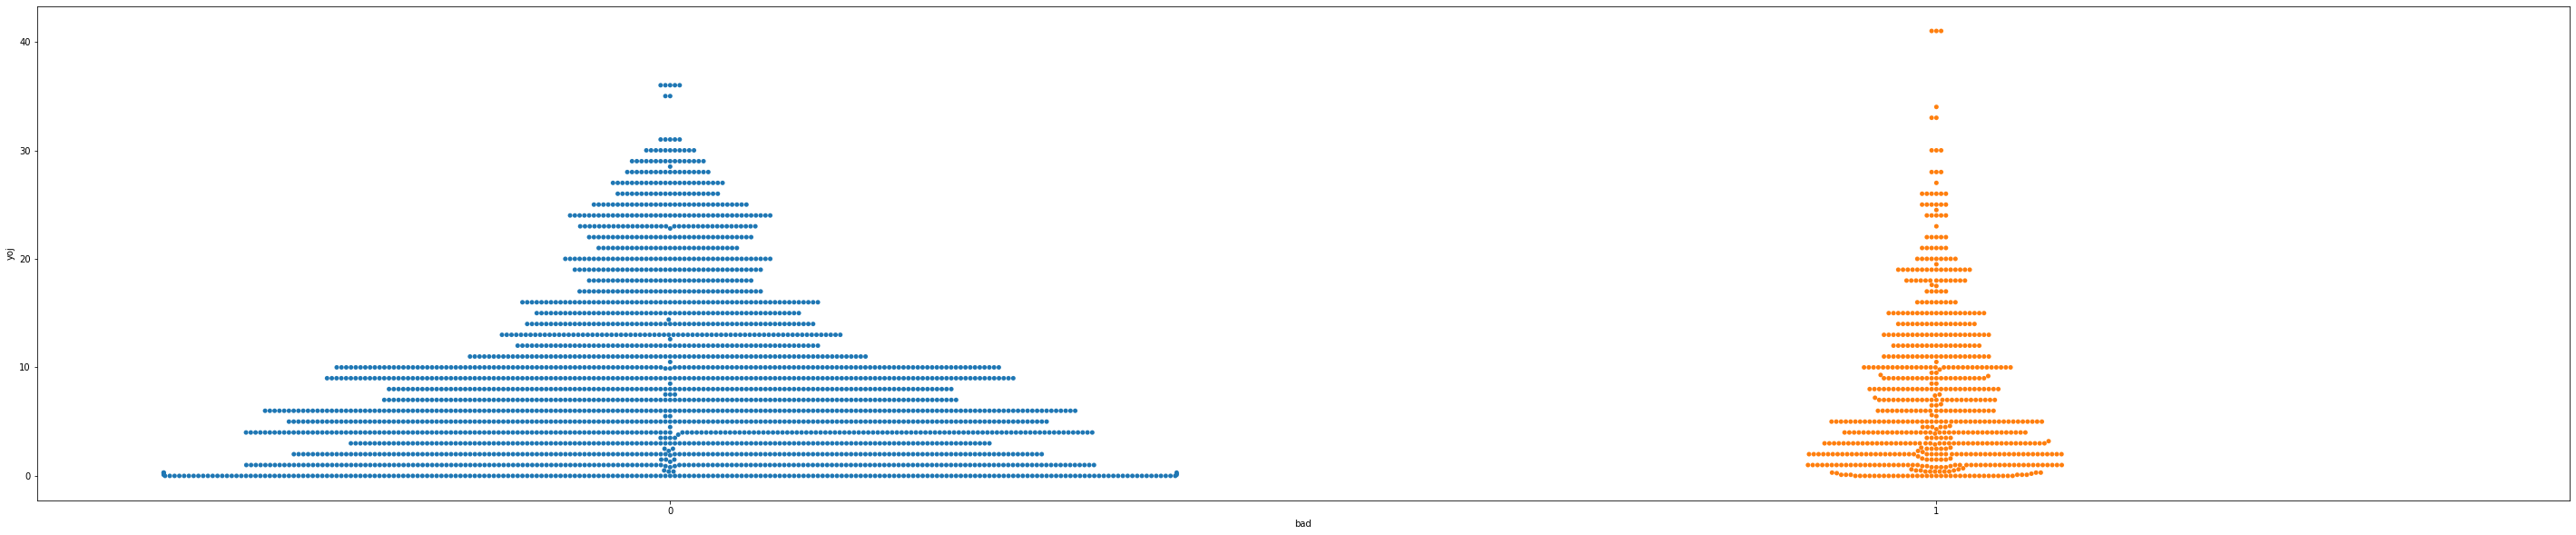

In [176]:
sns.swarmplot(x="bad", y="yoj", data=data);

In [177]:
pd.crosstab(index=data["derog"], columns=data["bad"])

bad,0,1
derog,,
0.0,2254,452
1.0,162,103
2.0,49,49
3.0,10,25
4.0,4,10
5.0,4,4
6.0,4,6
7.0,0,7
8.0,0,3


In [186]:
data.groupby("bad")["derog"].mean()

bad
0    0.140732
1    0.716012
Name: derog, dtype: float64

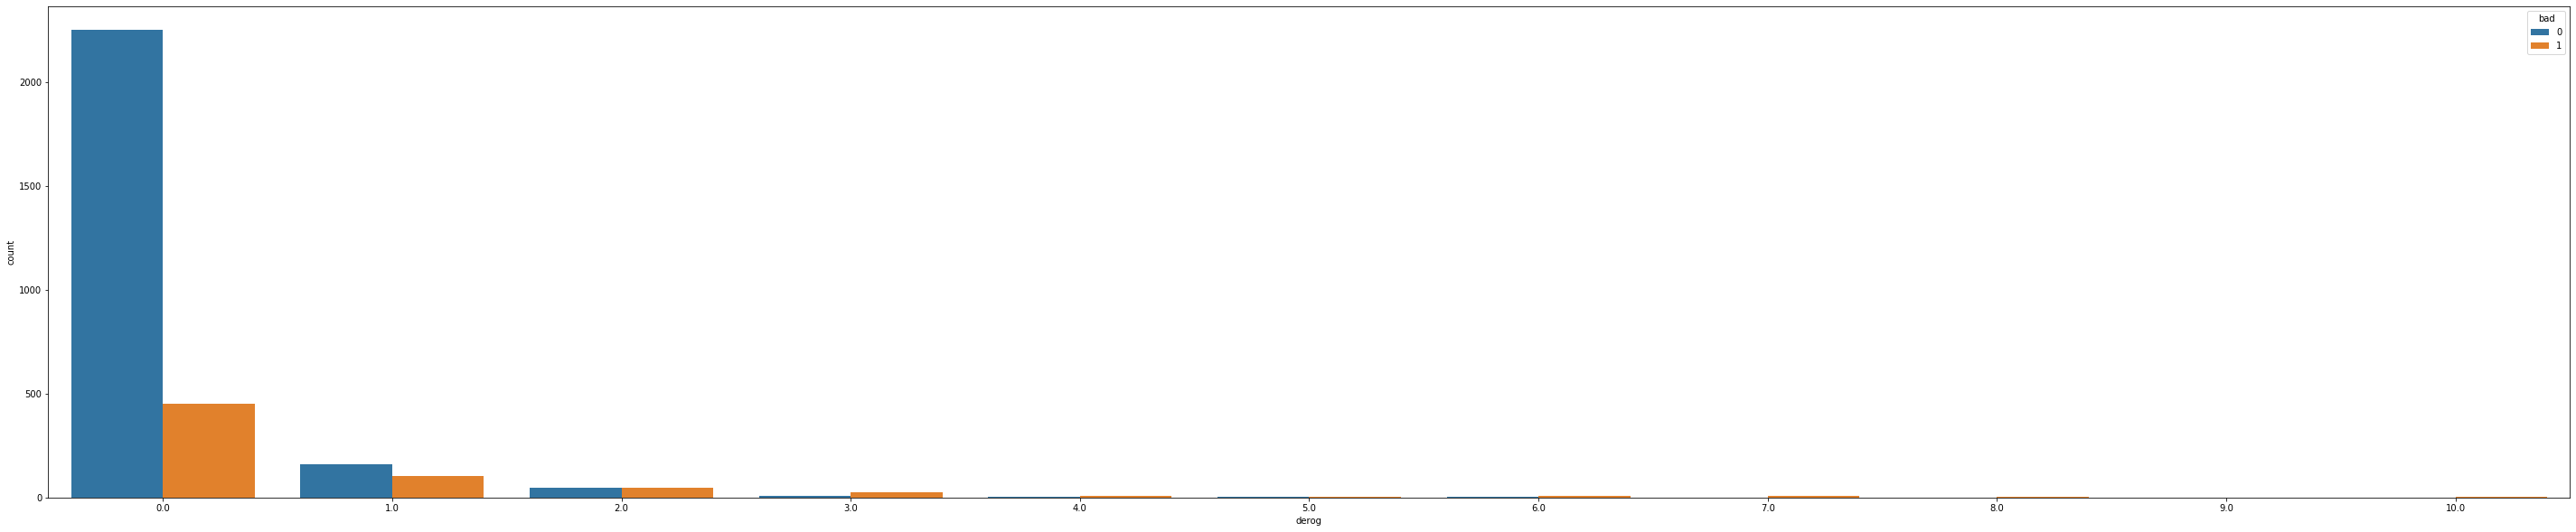

In [179]:
sns.countplot("derog", hue="bad", data=data)

In [180]:
pd.crosstab(index=data["delinq"], columns=data["bad"])

bad,0,1
delinq,,
0.0,2162,355
1.0,258,140
2.0,85,57
3.0,27,42
4.0,20,31
5.0,4,17
6.0,0,15
7.0,0,5
8.0,0,3


In [185]:
data.groupby("bad")["delinq"].mean()

bad
0    0.238263
1    1.174888
Name: delinq, dtype: float64

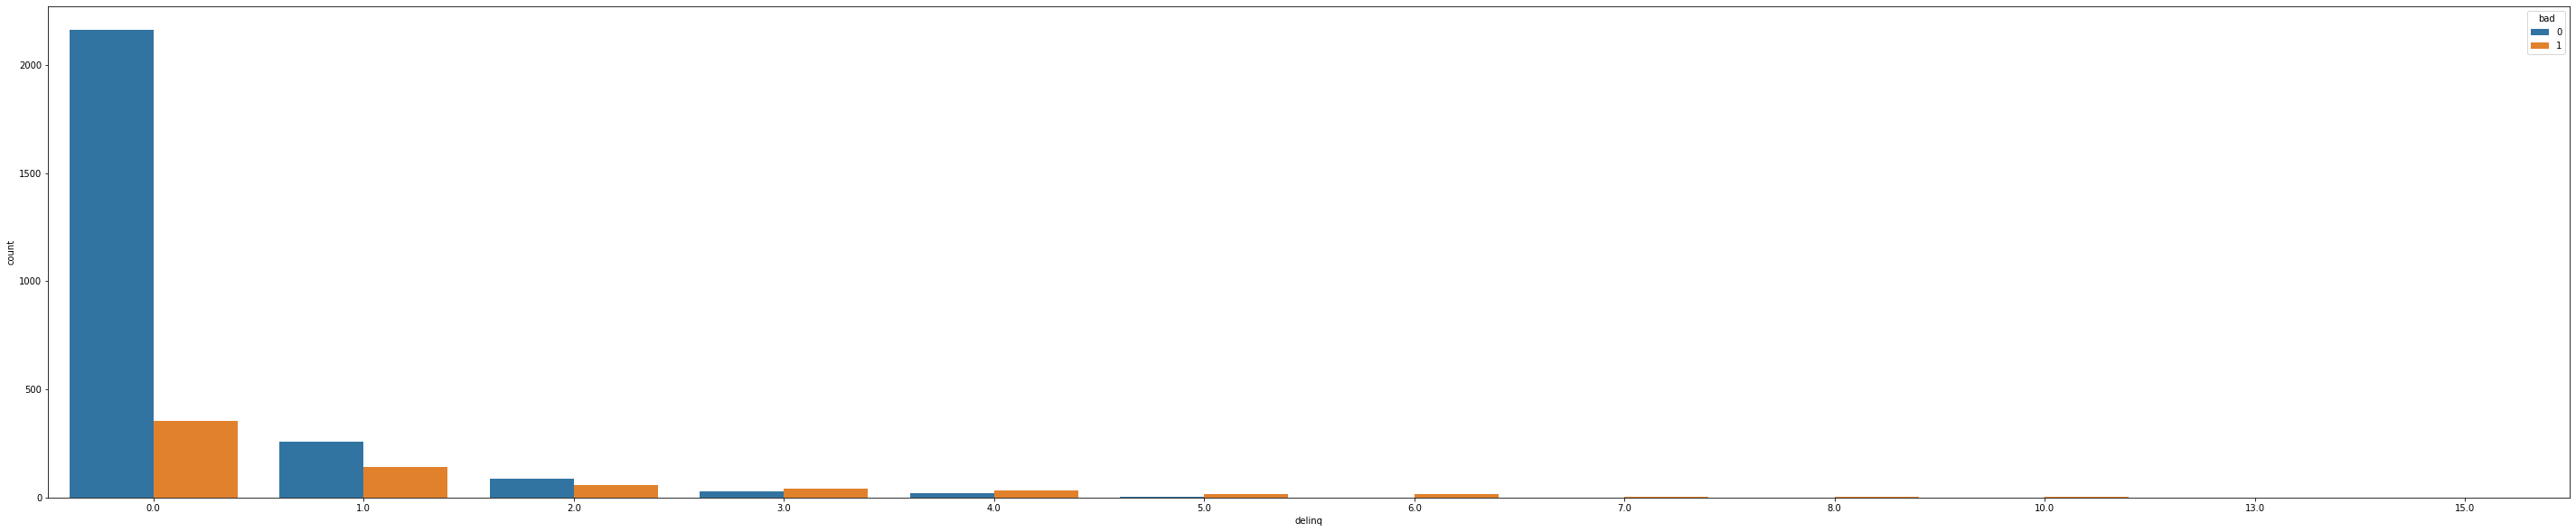

In [181]:
sns.countplot("delinq", hue="bad", data=data)

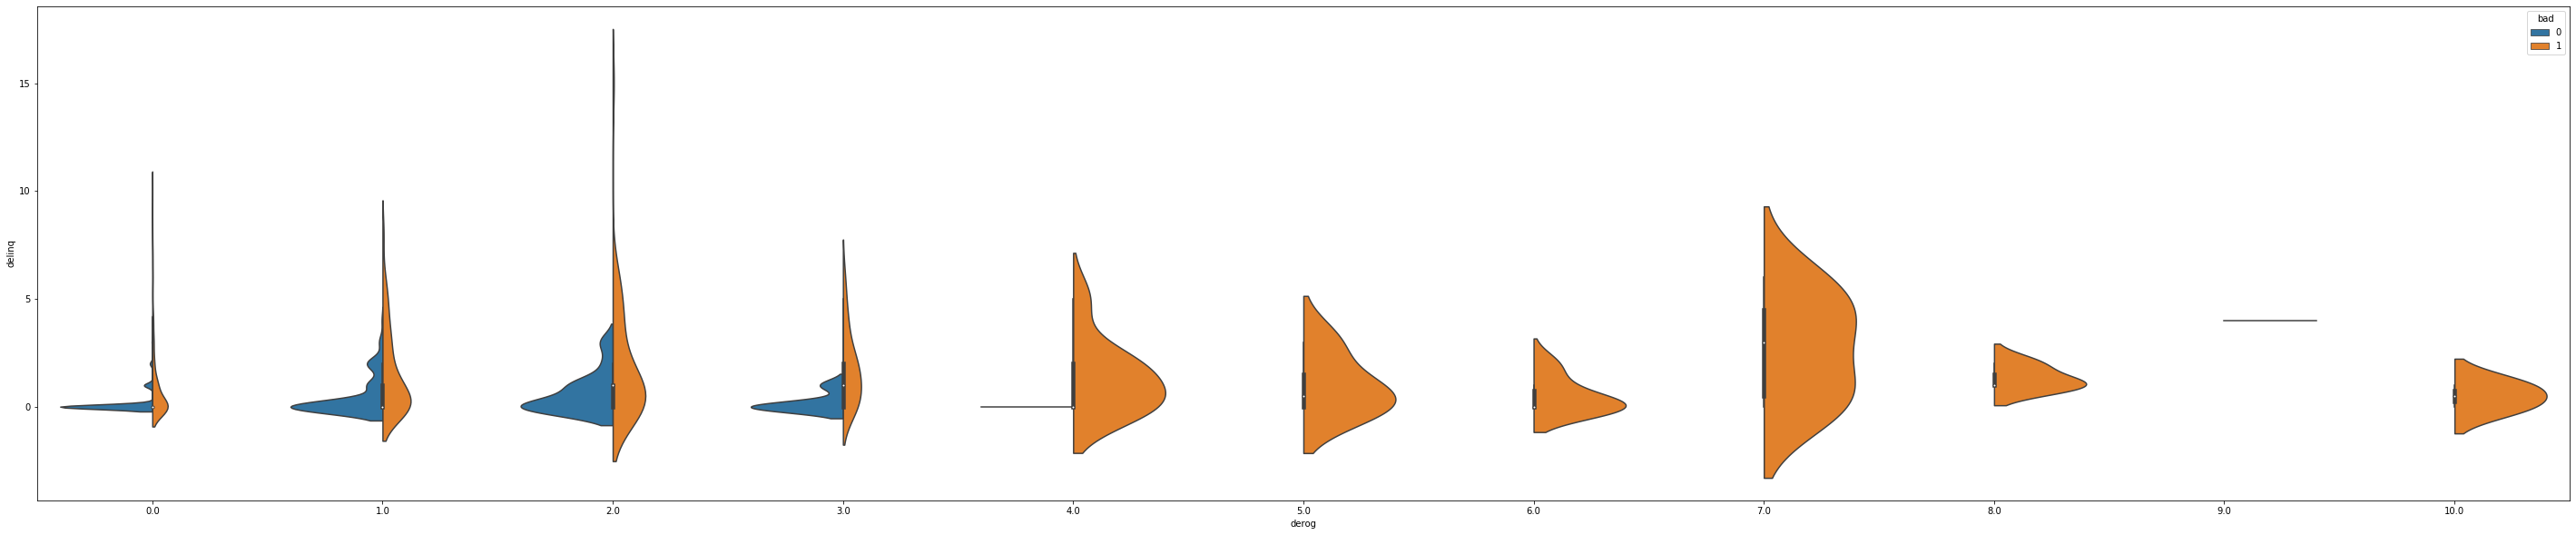

In [183]:
sns.violinplot(x="derog", y="delinq", hue="bad", data=data, split=True);

In [187]:
pd.crosstab(index=data["clage"], columns=data["bad"])

bad,0,1
clage,,
0.49,1,0
2.03,0,1
3.04,1,0
4.41,1,0
8.06,0,1
...,...,...
634.46,1,0
639.06,1,0
648.33,1,0


In [190]:
data.groupby("bad")["clage"].mean()

bad
0    186.338950
1    153.497474
Name: clage, dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


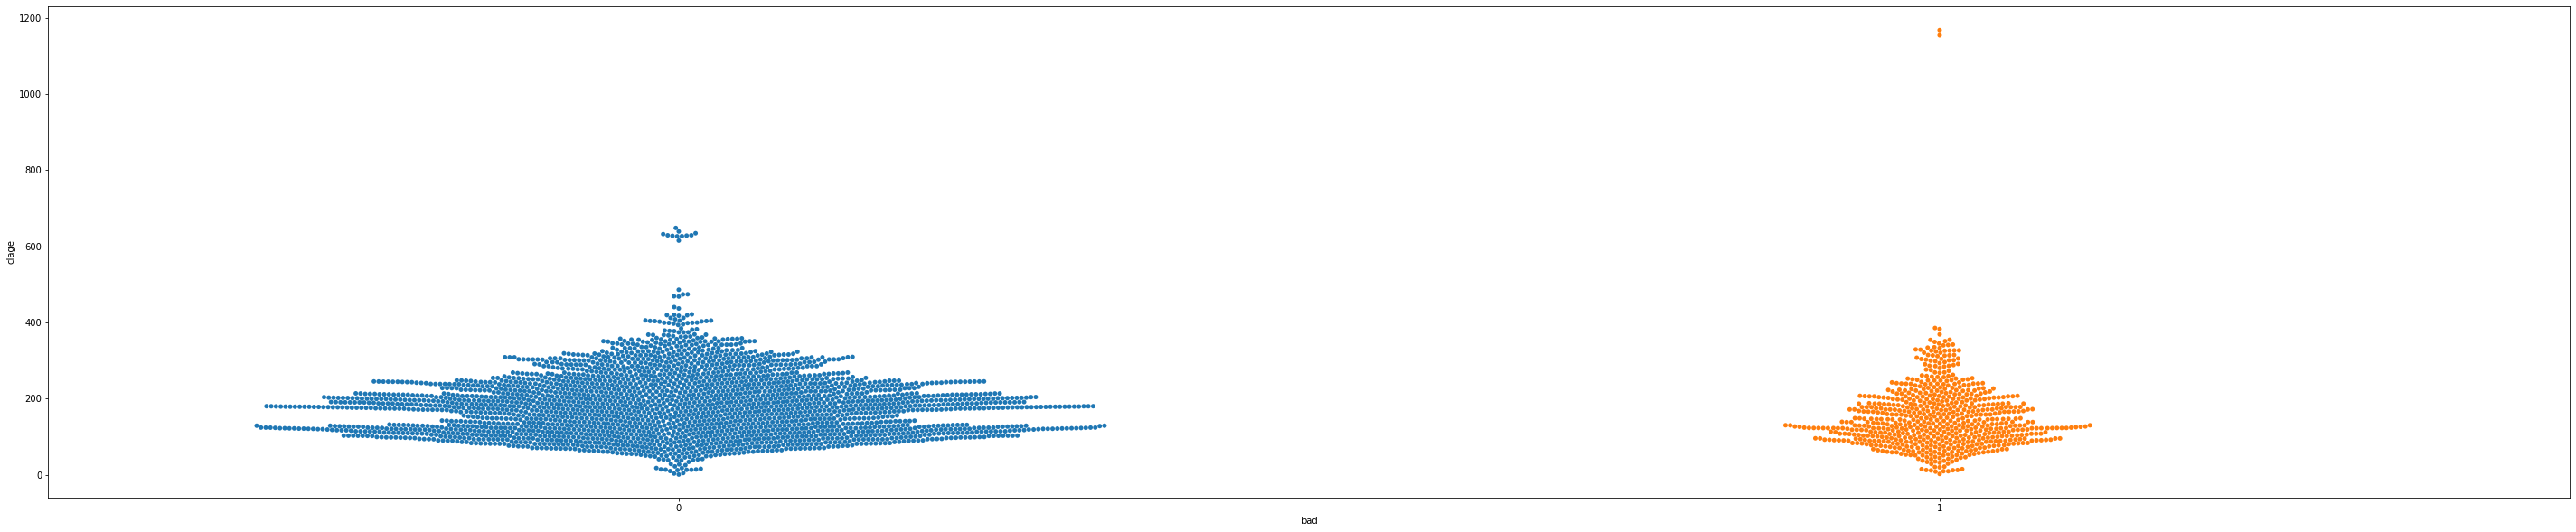

In [189]:
sns.swarmplot(x="bad", y="clage", data=data);

In [191]:
pd.crosstab(index=data["ninq"], columns=data["bad"])

bad,0,1
ninq,,
0.0,1280,239
1.0,653,152
2.0,364,105
3.0,168,67
4.0,53,40
5.0,20,24
6.0,15,19
7.0,18,11
8.0,9,4


In [192]:
data.groupby("bad")["clage"].mean()

bad
0    186.338950
1    153.497474
Name: clage, dtype: float64

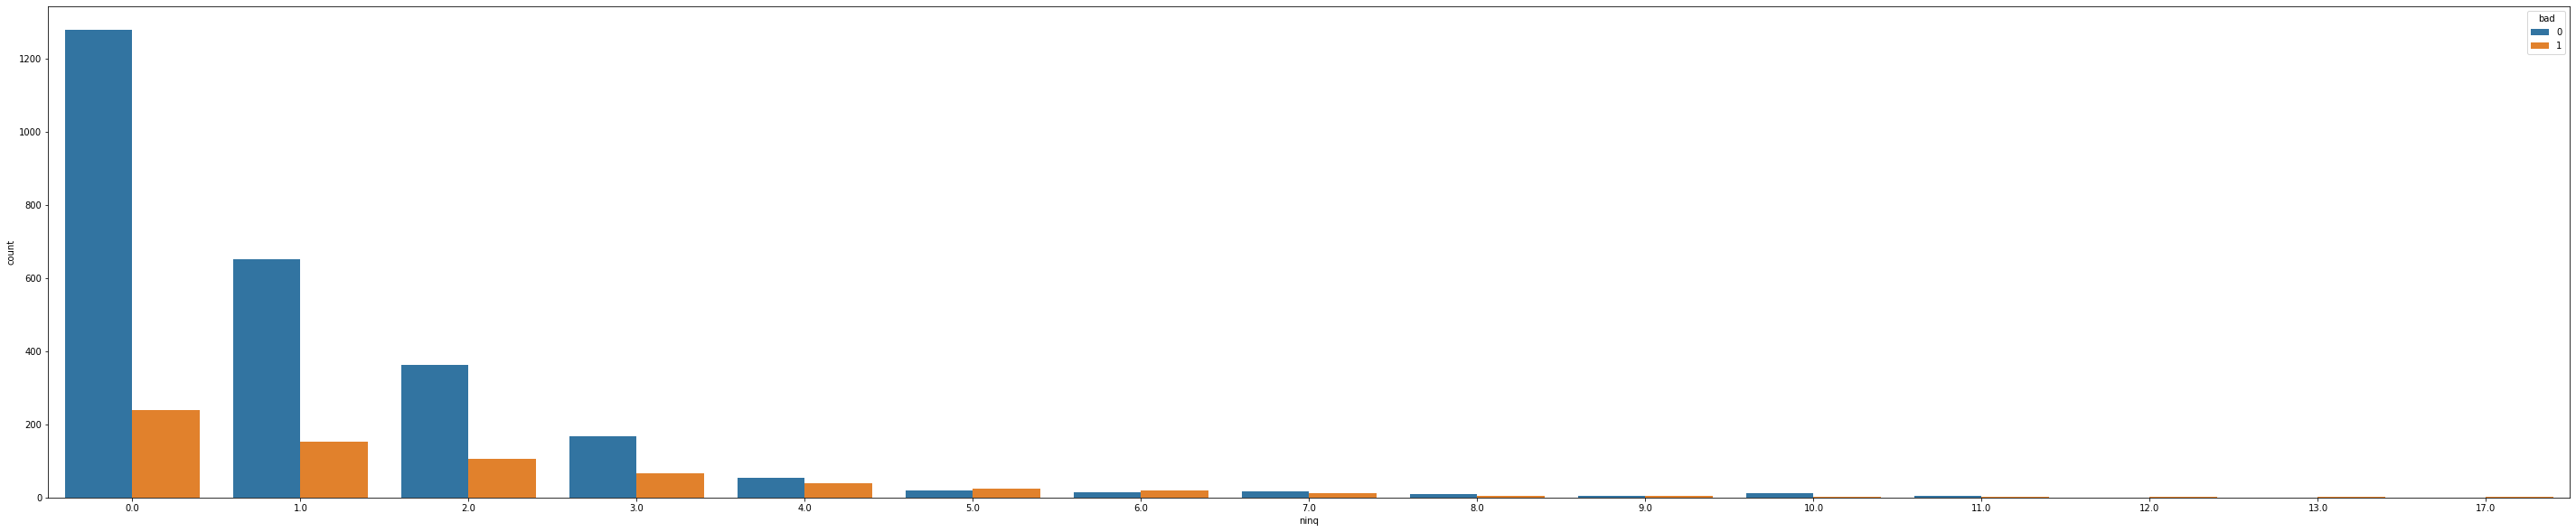

In [193]:
sns.countplot("ninq", hue="bad", data=data)

In [196]:
pd.crosstab(index=data["clno"], columns=data["bad"])

bad,0,1
clno,,
0.0,21,12
1.0,1,2
2.0,0,7
3.0,13,9
4.0,18,7
...,...,...
57.0,0,1
58.0,0,2
64.0,0,4


In [198]:
data.groupby("bad")["clno"].mean()

bad
0    21.552536
1    21.323572
Name: clno, dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


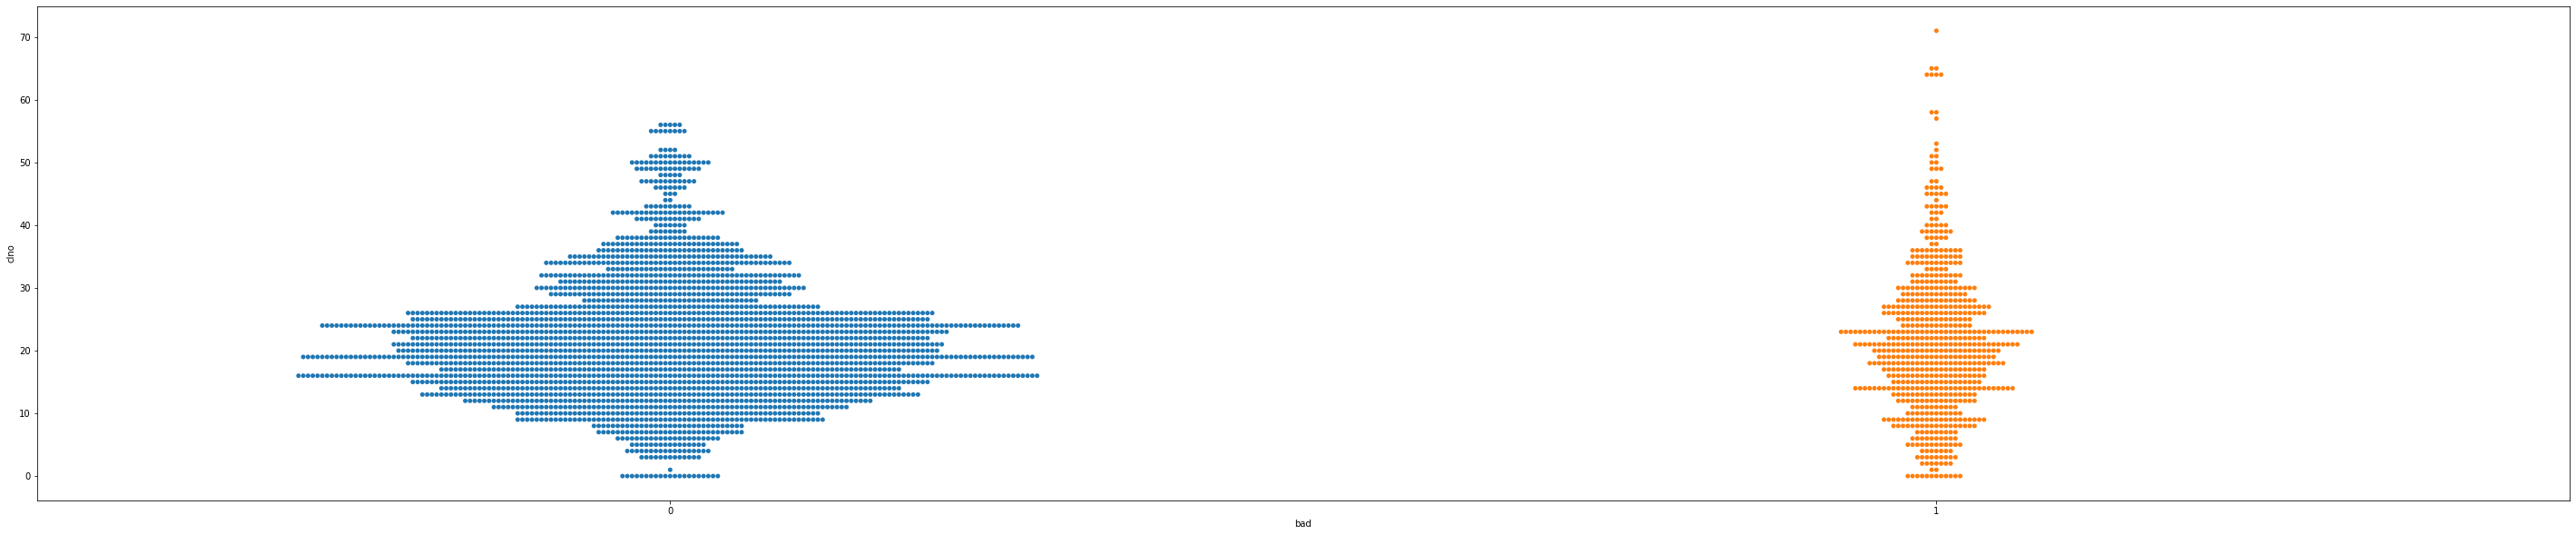

In [197]:
sns.swarmplot(x="bad", y="clno", data=data);

In [199]:
pd.crosstab(index=data["debtinc"], columns=data["bad"])

bad,0,1
debtinc,,
0.720,1,0
1.029,0,1
1.566,1,0
1.604,1,0
2.365,1,0
...,...,...
91.613,0,1
114.051,0,1
143.950,0,1


In [202]:
data.groupby("bad")["debtinc"].mean()

bad
0    33.179142
1    40.881416
Name: debtinc, dtype: float64

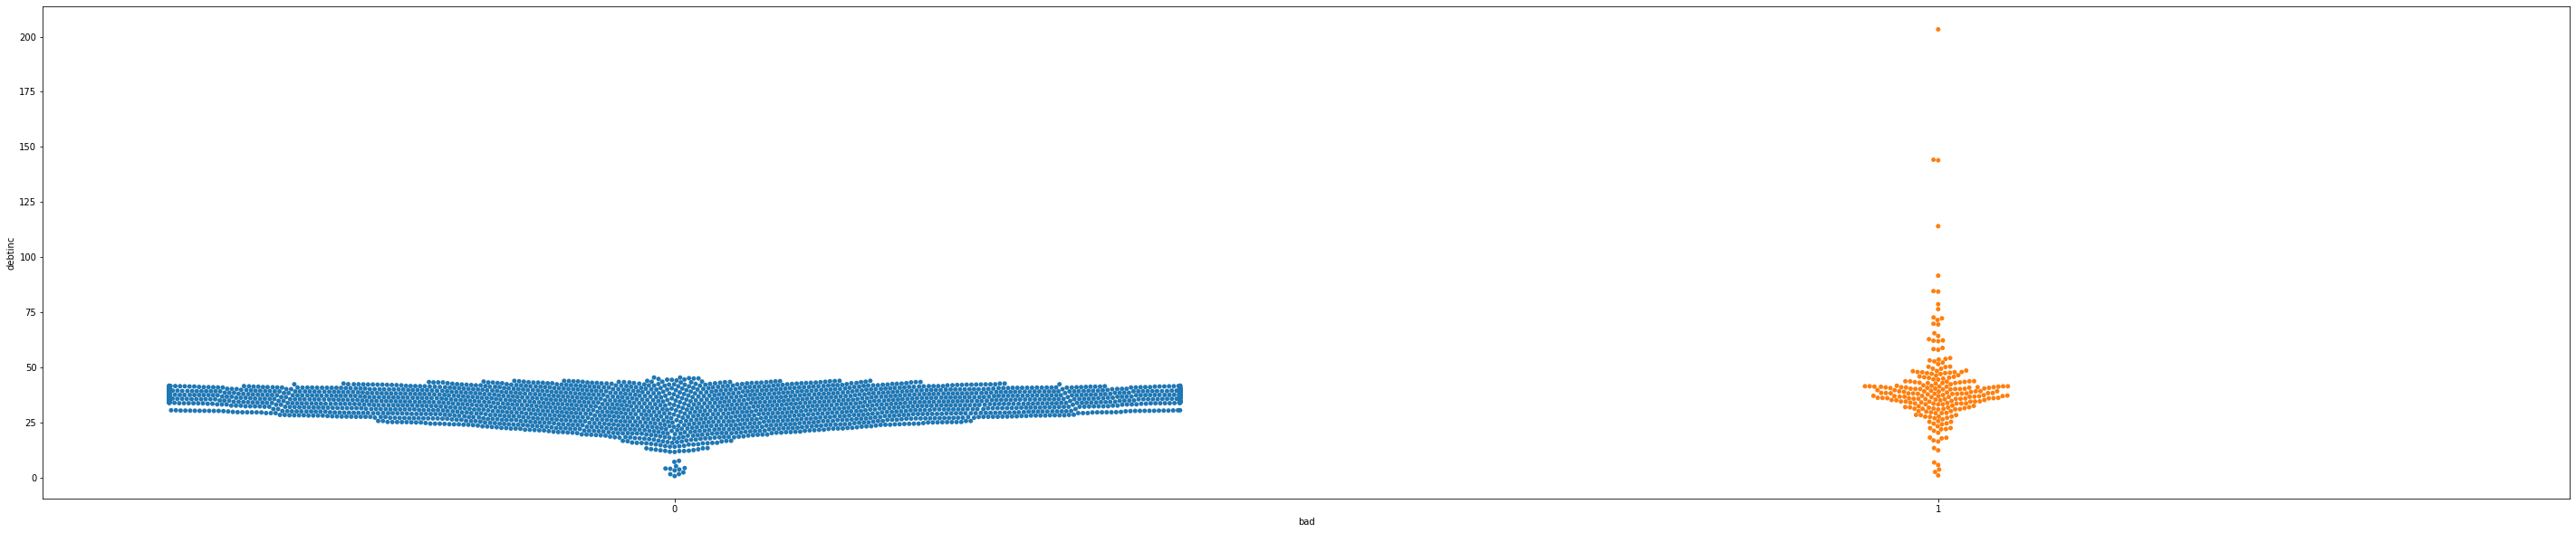

In [203]:
sns.swarmplot(x="bad", y="debtinc", data=data);

In [220]:
stat, p = shapiro(data["loan"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=0.849, p=0.000
Normal dağılımdan gelmiyor 


In [221]:
stat, p = shapiro(data["mortdue"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=nan, p=1.000
Normal dağılımdan geliyor 


In [227]:
stat, p = shapiro(data["value"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=nan, p=1.000
Normal dağılımdan geliyor 


In [230]:
stat, p = shapiro(data["yoj"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=nan, p=1.000
Normal dağılımdan geliyor 


In [231]:
stat, p = shapiro(data["derog"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=nan, p=1.000
Normal dağılımdan geliyor 


In [232]:
stat, p = shapiro(data["delinq"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=nan, p=1.000
Normal dağılımdan geliyor 


In [233]:
stat, p = shapiro(data["clage"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=nan, p=1.000
Normal dağılımdan geliyor 


In [234]:
stat, p = shapiro(data["ninq"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=nan, p=1.000
Normal dağılımdan geliyor 


In [235]:
stat, p = shapiro(data["clno"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=nan, p=1.000
Normal dağılımdan geliyor 


In [236]:
stat, p = shapiro(data["debtinc"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Normal dağılımdan geliyor ')
else:
    print('Normal dağılımdan gelmiyor ')

Statistics=nan, p=1.000
Normal dağılımdan geliyor 


In [ ]:
#Değişkenler arasındaki korelasyonu inceledik 

In [108]:
data.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.056226,-0.050254,-0.051532,0.270980,0.345548,-0.150367,0.174759,-0.008981,0.236738
loan,-0.071523,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,-0.056226,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,-0.050254,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,-0.051532,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,0.270980,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,0.345548,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,-0.150367,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.174759,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,-0.008981,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983


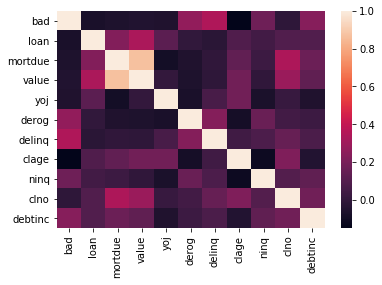

In [112]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [55]:
data.drop(['reason','job'], 1, inplace=True)
data.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3576 non-null   float64
 3   value    3576 non-null   float64
 4   yoj      3576 non-null   float64
 5   derog    3576 non-null   float64
 6   delinq   3576 non-null   float64
 7   clage    3576 non-null   float64
 8   ninq     3576 non-null   float64
 9   clno     3576 non-null   float64
 10  debtinc  3576 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 307.4 KB


In [56]:
pd.get_dummies(data,columns = ["bad"], prefix=["bad"]).head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,bad_0,bad_1
0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042,1,0
1,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479,1,0
2,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354,1,0
3,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992,1,0
4,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327,1,0


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [13]:
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
y = data["bad"]
X = data.drop(["bad"],axis =1)

In [14]:
loj = sm.Logit(y,X.astype("float64"))
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.415059
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3566
Method:                           MLE   Df Model:                            9
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.1691
Time:                        17:33:04   Log-Likelihood:                -1484.3
converged:                       True   LL-Null:                       -1786.4
Covariance Type:            nonrobust   LLR p-value:                2.541e-124
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan        -2.71e-05   5.14e-06     -5.273      0.000   -3.72e-05    -1.7e-05
mortdue    -6.454e-06   2.03e-06     -3.178      0.001   -1.04e-05   -2.47e-06
value       3.348e-06   1.52e-06      2.210      0.027    3.78e-07    6.32e-06
yoj           -0.0224      0.007     -3.145      0.002      -0.036      -0.008
derog          0.4603      0.058      7.985      0.000       0.347       0.573
delinq         0.7494      0.050     14.976      0.000       0.651       0.848
clage         -0.0069      0.001    -10.338      0.000      -0.008      -0.006
ninq           0.1366      0.026      5.205      0.000       0.085       0.188
clno          -0.0196      0.005     -3.629      0.000      -0.030      -0.009
debtinc        0.0087      0.004      2.240      0.025       0.001       0.016
==============================================================================
"""

In [15]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [16]:
loj_model.intercept_

array([-1.69103995e-05])

In [17]:
loj_model.coef_

array([[-1.81007128e-05, -4.42444328e-06,  1.90791085e-06,
        -2.52464400e-04,  8.87804404e-05,  1.51292956e-04,
        -5.39788492e-03,  1.06780562e-04, -1.40528091e-04,
         3.85912620e-05]])

In [18]:
y_pred = loj_model.predict(X)

In [19]:
confusion_matrix(y,y_pred)

array([[2863,    0],
       [ 713,    0]], dtype=int64)

In [20]:
accuracy_score(y,y_pred)

0.8006152125279642

In [21]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2863
           1       0.00      0.00      0.00       713

    accuracy                           0.80      3576
   macro avg       0.40      0.50      0.44      3576
weighted avg       0.64      0.80      0.71      3576



In [22]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.89140538, 0.10859462],
       [0.75843827, 0.24156173],
       [0.72538983, 0.27461017],
       [0.76157324, 0.23842676],
       [0.73911849, 0.26088151],
       [0.71064839, 0.28935161],
       [0.88860944, 0.11139056],
       [0.7766291 , 0.2233709 ],
       [0.81841768, 0.18158232],
       [0.76360361, 0.23639639]])

In [24]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: bad, dtype: int64

In [25]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [26]:
y_probs[0:10]

array([0.10859462, 0.24156173, 0.27461017, 0.23842676, 0.26088151,
       0.28935161, 0.11139056, 0.2233709 , 0.18158232, 0.23639639])

In [27]:
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
confusion_matrix(y,y_pred)

array([[2863,    0],
       [ 713,    0]], dtype=int64)

In [29]:
accuracy_score(y,y_pred)

0.8006152125279642

In [30]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.10859462, 0.24156173, 0.27461017, 0.23842676, 0.26088151])

In [31]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2863
           1       0.00      0.00      0.00       713

    accuracy                           0.80      3576
   macro avg       0.40      0.50      0.44      3576
weighted avg       0.64      0.80      0.71      3576



In [32]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.10859462, 0.24156173, 0.27461017, 0.23842676, 0.26088151])

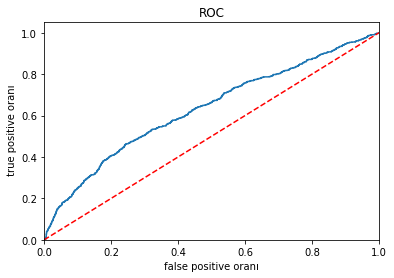

In [33]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive oranı')
plt.ylabel(' true positive oranı')
plt.title('ROC')
plt.show()

In [34]:
logit_roc_auc

0.5

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

In [37]:
accuracy_score(y_test, loj_model.predict(X_test))

0.8240223463687151

In [38]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.8282472613458529

## Cart

In [57]:
y = data["bad"]
X = data.drop(["bad"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve

In [59]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [60]:
cart_model

DecisionTreeClassifier()

In [96]:
#!pip install skompiler

In [97]:
from skompiler import skompile
print(skompile(cart_model.predict))

2682.0


In [98]:
X = [6]

In [99]:
((0 if X[0] <= 2.5 else 0) if X[0] <= 6.5 else 1 if X[0] <=13.5 else 1)

0

In [62]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.843400447427293

In [63]:
confusion_matrix(y_test,y_pred)

array([[667,  76],
       [ 64,  87]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       743
           1       0.53      0.58      0.55       151

    accuracy                           0.84       894
   macro avg       0.72      0.74      0.73       894
weighted avg       0.85      0.84      0.85       894



## Model Tuning

In [65]:
from sklearn import tree

In [66]:
cart_model

DecisionTreeClassifier()

In [67]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split": list(range(2,50))}

In [68]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs = -1, verbose =2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 2062 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  1.1min finished


In [69]:
print("En iyi parametreler: " +str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 3}


In [70]:
cart = tree.DecisionTreeClassifier(max_depth =  5, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

In [71]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8847874720357942

In [72]:
confusion_matrix(y_test,y_pred)

array([[688,  55],
       [ 48, 103]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       743
           1       0.65      0.68      0.67       151

    accuracy                           0.88       894
   macro avg       0.79      0.80      0.80       894
weighted avg       0.89      0.88      0.89       894



## Random Forests

In [75]:
y = data["bad"]
X = data.drop(["bad"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [78]:
rf_model

RandomForestClassifier()

In [79]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9093959731543624

In [80]:
confusion_matrix(y_test,y_pred)

array([[720,  23],
       [ 58,  93]], dtype=int64)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       743
           1       0.80      0.62      0.70       151

    accuracy                           0.91       894
   macro avg       0.86      0.79      0.82       894
weighted avg       0.90      0.91      0.90       894



## Model Tuning

In [82]:
rf_model

RandomForestClassifier()

In [83]:
rf_params = {"max_depth": [2,5,8,10],
              "max_features": [2,5,8],
              "n_estimators": [10,20,50],
            "min_samples_split": [5,10]}

In [84]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv=10,
                          n_jobs= -1,
                          verbose = 2)

In [85]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 575 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.6min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 20, 50]},
             verbose=2)

In [86]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 50}


In [87]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                 max_features = 2,
                                 min_samples_split = 5,
                                 n_estimators = 50)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=5,
                       n_estimators=50)

In [88]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9071588366890381

In [89]:
confusion_matrix(y_test,y_pred)

array([[732,  11],
       [ 72,  79]], dtype=int64)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       743
           1       0.88      0.52      0.66       151

    accuracy                           0.91       894
   macro avg       0.89      0.75      0.80       894
weighted avg       0.90      0.91      0.90       894



In [215]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index= X_train.columns)

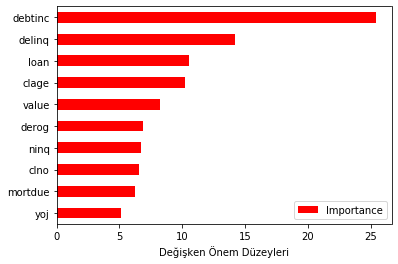

In [216]:
Importance.sort_values(by= "Importance",
                      axis=0,
                      ascending =True).plot(kind= "barh", color="r")
plt.xlabel("Değişken Önem Düzeyleri");

## Neural Network

In [91]:
y = data["bad"]
X = data.drop(["bad"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [93]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)
mlp_model

MLPClassifier(hidden_layer_sizes=(100, 20))

In [221]:
y_pred = mlp_model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.883668903803132

In [222]:
confusion_matrix(y_test,y_pred)

array([[700,  43],
       [ 61,  90]], dtype=int64)

In [223]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       743
           1       0.68      0.60      0.63       151

    accuracy                           0.88       894
   macro avg       0.80      0.77      0.78       894
weighted avg       0.88      0.88      0.88       894



## Model Tuning

In [224]:
mlp_param2 = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(10,10,10),
                                    (20,20), 
                                    (10,20,15), 
                                    (30,20,15),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","logistic"],
             "solver": ["lbfgs", "adam","sgd"]}


mlp_cv_model = GridSearchCV(mlp_model, mlp_param2, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 83.4min finished
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(100, 20),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
        

In [225]:
mlp_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.005,
 'hidden_layer_sizes': (30, 20, 15),
 'solver': 'adam'}

In [226]:
mlp_tuned = MLPClassifier(alpha= 0.005, hidden_layer_sizes=(30,20,15), activation="relu", solver="adam")
mlp_tuned.fit(X_train_scaled, y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8736017897091722

In [227]:
confusion_matrix(y_test,y_pred)

array([[697,  46],
       [ 67,  84]], dtype=int64)

In [228]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       743
           1       0.65      0.56      0.60       151

    accuracy                           0.87       894
   macro avg       0.78      0.75      0.76       894
weighted avg       0.87      0.87      0.87       894



## SVC

## Model ve Tahmin

In [160]:
from sklearn.svm import SVC

In [161]:
y = data["bad"]
X = data.drop(["bad"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [162]:
svm_model = SVC(kernel = 'linear').fit(X_train, y_train)

In [163]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [164]:
y_pred = svm_model.predict(X_test)

In [165]:
accuracy_score(y_test, y_pred)

0.843400447427293

## Model Tuning

In [166]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc, svc_params,
                           cv=10,
                           n_jobs= -1,
                           verbose = 2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 453.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 994.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [167]:
svc_cv_model.best_params_

{'C': 1}

In [168]:
svc_tuned = SVC(kernel ="linear", C=1).fit(X_train, y_train)

In [169]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.843400447427293

## RBF SVC 

## Model ve Tahmin

In [170]:
y = data["bad"]
X = data.drop(["bad"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [171]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [172]:
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [173]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.831096196868009

## Model Tuning

In [175]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10, 50,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10, 50,100]}

In [176]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params,
                           cv=10,
                           n_jobs=-1,
                           verbose=2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  6.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [177]:
svc_cv_model.best_params_

{'C': 0.0001, 'gamma': 0.0001}

In [178]:
svc_tuned = SVC(C = 0.0001, gamma = 0.0001).fit(X_train, y_train) 

In [179]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.831096196868009

## CatBoost

In [231]:
!pip install catboost


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=5a1c51fa8fc96643bee2f66a95082d7560ee2ea598263200dbbbb74c24681499
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [232]:
from catboost import CatBoostClassifier

In [233]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0157
0:	learn: 0.6794613	total: 126ms	remaining: 2m 6s
1:	learn: 0.6665113	total: 143ms	remaining: 1m 11s
2:	learn: 0.6526643	total: 167ms	remaining: 55.4s
3:	learn: 0.6418014	total: 175ms	remaining: 43.5s
4:	learn: 0.6310025	total: 184ms	remaining: 36.7s
5:	learn: 0.6177611	total: 197ms	remaining: 32.6s
6:	learn: 0.6099741	total: 207ms	remaining: 29.4s
7:	learn: 0.5994132	total: 219ms	remaining: 27.1s
8:	learn: 0.5923266	total: 230ms	remaining: 25.4s
9:	learn: 0.5828099	total: 242ms	remaining: 24s
10:	learn: 0.5716006	total: 253ms	remaining: 22.7s
11:	learn: 0.5640574	total: 263ms	remaining: 21.6s
12:	learn: 0.5570569	total: 286ms	remaining: 21.7s
13:	learn: 0.5515558	total: 295ms	remaining: 20.8s
14:	learn: 0.5432913	total: 306ms	remaining: 20.1s
15:	learn: 0.5353564	total: 378ms	remaining: 23.2s
16:	learn: 0.5272631	total: 397ms	remaining: 23s
17:	learn: 0.5231791	total: 411ms	remaining: 22.4s
18:	learn: 0.5177244	total: 425ms	remaining: 22s
19:	learn: 0.51320

160:	learn: 0.2688097	total: 3.08s	remaining: 16s
161:	learn: 0.2682782	total: 3.12s	remaining: 16.1s
162:	learn: 0.2675291	total: 3.16s	remaining: 16.2s
163:	learn: 0.2670352	total: 3.2s	remaining: 16.3s
164:	learn: 0.2666337	total: 3.22s	remaining: 16.3s
165:	learn: 0.2663038	total: 3.23s	remaining: 16.2s
166:	learn: 0.2658450	total: 3.24s	remaining: 16.2s
167:	learn: 0.2653966	total: 3.26s	remaining: 16.1s
168:	learn: 0.2651180	total: 3.31s	remaining: 16.3s
169:	learn: 0.2647251	total: 3.32s	remaining: 16.2s
170:	learn: 0.2641295	total: 3.34s	remaining: 16.2s
171:	learn: 0.2637359	total: 3.35s	remaining: 16.1s
172:	learn: 0.2634280	total: 3.37s	remaining: 16.1s
173:	learn: 0.2630868	total: 3.38s	remaining: 16.1s
174:	learn: 0.2626613	total: 3.4s	remaining: 16s
175:	learn: 0.2622694	total: 3.41s	remaining: 16s
176:	learn: 0.2616279	total: 3.45s	remaining: 16s
177:	learn: 0.2612617	total: 3.47s	remaining: 16s
178:	learn: 0.2610374	total: 3.49s	remaining: 16s
179:	learn: 0.2605133	tota

324:	learn: 0.2178231	total: 6.08s	remaining: 12.6s
325:	learn: 0.2175664	total: 6.13s	remaining: 12.7s
326:	learn: 0.2174360	total: 6.16s	remaining: 12.7s
327:	learn: 0.2172090	total: 6.17s	remaining: 12.6s
328:	learn: 0.2170372	total: 6.18s	remaining: 12.6s
329:	learn: 0.2166692	total: 6.19s	remaining: 12.6s
330:	learn: 0.2164308	total: 6.2s	remaining: 12.5s
331:	learn: 0.2162579	total: 6.21s	remaining: 12.5s
332:	learn: 0.2161239	total: 6.22s	remaining: 12.5s
333:	learn: 0.2159690	total: 6.23s	remaining: 12.4s
334:	learn: 0.2158549	total: 6.24s	remaining: 12.4s
335:	learn: 0.2155953	total: 6.25s	remaining: 12.4s
336:	learn: 0.2151912	total: 6.26s	remaining: 12.3s
337:	learn: 0.2149666	total: 6.28s	remaining: 12.3s
338:	learn: 0.2148306	total: 6.29s	remaining: 12.3s
339:	learn: 0.2147439	total: 6.36s	remaining: 12.3s
340:	learn: 0.2146148	total: 6.37s	remaining: 12.3s
341:	learn: 0.2143947	total: 6.39s	remaining: 12.3s
342:	learn: 0.2141840	total: 6.4s	remaining: 12.3s
343:	learn: 0.

484:	learn: 0.1869826	total: 9.22s	remaining: 9.79s
485:	learn: 0.1868704	total: 9.23s	remaining: 9.77s
486:	learn: 0.1866671	total: 9.25s	remaining: 9.74s
487:	learn: 0.1865020	total: 9.26s	remaining: 9.71s
488:	learn: 0.1863283	total: 9.3s	remaining: 9.72s
489:	learn: 0.1861730	total: 9.31s	remaining: 9.7s
490:	learn: 0.1858910	total: 9.41s	remaining: 9.76s
491:	learn: 0.1856973	total: 9.42s	remaining: 9.73s
492:	learn: 0.1856305	total: 9.43s	remaining: 9.7s
493:	learn: 0.1852993	total: 9.48s	remaining: 9.71s
494:	learn: 0.1851555	total: 9.49s	remaining: 9.68s
495:	learn: 0.1849619	total: 9.5s	remaining: 9.65s
496:	learn: 0.1847895	total: 9.51s	remaining: 9.63s
497:	learn: 0.1846422	total: 9.52s	remaining: 9.6s
498:	learn: 0.1843369	total: 9.53s	remaining: 9.57s
499:	learn: 0.1841428	total: 9.56s	remaining: 9.56s
500:	learn: 0.1840007	total: 9.57s	remaining: 9.53s
501:	learn: 0.1838885	total: 9.58s	remaining: 9.51s
502:	learn: 0.1837465	total: 9.6s	remaining: 9.48s
503:	learn: 0.1836

644:	learn: 0.1588716	total: 12s	remaining: 6.62s
645:	learn: 0.1588038	total: 12s	remaining: 6.6s
646:	learn: 0.1586300	total: 12.1s	remaining: 6.58s
647:	learn: 0.1584671	total: 12.1s	remaining: 6.55s
648:	learn: 0.1583316	total: 12.1s	remaining: 6.53s
649:	learn: 0.1581475	total: 12.1s	remaining: 6.51s
650:	learn: 0.1579583	total: 12.1s	remaining: 6.49s
651:	learn: 0.1577171	total: 12.1s	remaining: 6.46s
652:	learn: 0.1576036	total: 12.1s	remaining: 6.44s
653:	learn: 0.1574788	total: 12.2s	remaining: 6.44s
654:	learn: 0.1573678	total: 12.2s	remaining: 6.43s
655:	learn: 0.1571903	total: 12.2s	remaining: 6.41s
656:	learn: 0.1570744	total: 12.2s	remaining: 6.39s
657:	learn: 0.1569455	total: 12.3s	remaining: 6.38s
658:	learn: 0.1568241	total: 12.3s	remaining: 6.35s
659:	learn: 0.1565334	total: 12.3s	remaining: 6.33s
660:	learn: 0.1563327	total: 12.3s	remaining: 6.31s
661:	learn: 0.1561503	total: 12.3s	remaining: 6.3s
662:	learn: 0.1559950	total: 12.4s	remaining: 6.28s
663:	learn: 0.1557

814:	learn: 0.1355028	total: 14.7s	remaining: 3.35s
815:	learn: 0.1353806	total: 14.8s	remaining: 3.33s
816:	learn: 0.1352812	total: 14.8s	remaining: 3.32s
817:	learn: 0.1351821	total: 14.8s	remaining: 3.3s
818:	learn: 0.1351241	total: 14.8s	remaining: 3.28s
819:	learn: 0.1349837	total: 14.8s	remaining: 3.26s
820:	learn: 0.1349107	total: 14.8s	remaining: 3.24s
821:	learn: 0.1348659	total: 14.9s	remaining: 3.22s
822:	learn: 0.1347033	total: 14.9s	remaining: 3.2s
823:	learn: 0.1346026	total: 14.9s	remaining: 3.18s
824:	learn: 0.1344433	total: 14.9s	remaining: 3.16s
825:	learn: 0.1343645	total: 14.9s	remaining: 3.14s
826:	learn: 0.1341957	total: 14.9s	remaining: 3.12s
827:	learn: 0.1341683	total: 15s	remaining: 3.11s
828:	learn: 0.1341098	total: 15s	remaining: 3.09s
829:	learn: 0.1339105	total: 15s	remaining: 3.07s
830:	learn: 0.1336387	total: 15s	remaining: 3.05s
831:	learn: 0.1334836	total: 15s	remaining: 3.03s
832:	learn: 0.1333283	total: 15s	remaining: 3.01s
833:	learn: 0.1331645	tota

982:	learn: 0.1161936	total: 17.3s	remaining: 299ms
983:	learn: 0.1161663	total: 17.3s	remaining: 282ms
984:	learn: 0.1160387	total: 17.3s	remaining: 264ms
985:	learn: 0.1160273	total: 17.3s	remaining: 246ms
986:	learn: 0.1159536	total: 17.4s	remaining: 229ms
987:	learn: 0.1158052	total: 17.4s	remaining: 211ms
988:	learn: 0.1157078	total: 17.4s	remaining: 193ms
989:	learn: 0.1156360	total: 17.4s	remaining: 176ms
990:	learn: 0.1154788	total: 17.4s	remaining: 158ms
991:	learn: 0.1154196	total: 17.4s	remaining: 140ms
992:	learn: 0.1152225	total: 17.4s	remaining: 123ms
993:	learn: 0.1151531	total: 17.5s	remaining: 105ms
994:	learn: 0.1150716	total: 17.5s	remaining: 87.8ms
995:	learn: 0.1149601	total: 17.5s	remaining: 70.3ms
996:	learn: 0.1148989	total: 17.5s	remaining: 52.7ms
997:	learn: 0.1147489	total: 17.5s	remaining: 35.1ms
998:	learn: 0.1146331	total: 17.5s	remaining: 17.6ms
999:	learn: 0.1145167	total: 17.6s	remaining: 0us


In [234]:
y_pred = cat_model.predict(X_test)

In [235]:
accuracy_score(y_test, y_pred)

0.9116331096196868

## Model Tuning

In [236]:
catb_params = {'iterations': [200,50],
               'learning_rate': [0.01,0.05,0.1],
               'depth': [3,5,8]}

In [238]:
catb = CatBoostClassifier()

In [239]:
catb_cv_model = GridSearchCV(catb, catb_params, cv = 5, n_jobs = -1, verbose = 2)

In [240]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.9min finished


0:	learn: 0.6034210	total: 24.6ms	remaining: 4.89s
1:	learn: 0.5535756	total: 41.7ms	remaining: 4.13s
2:	learn: 0.4931287	total: 58.4ms	remaining: 3.83s
3:	learn: 0.4520058	total: 76.4ms	remaining: 3.74s
4:	learn: 0.4239714	total: 92.3ms	remaining: 3.6s
5:	learn: 0.3920142	total: 109ms	remaining: 3.53s
6:	learn: 0.3698563	total: 140ms	remaining: 3.86s
7:	learn: 0.3573104	total: 156ms	remaining: 3.74s
8:	learn: 0.3482893	total: 194ms	remaining: 4.12s
9:	learn: 0.3365046	total: 212ms	remaining: 4.03s
10:	learn: 0.3264061	total: 237ms	remaining: 4.07s
11:	learn: 0.3122481	total: 288ms	remaining: 4.52s
12:	learn: 0.3000518	total: 334ms	remaining: 4.8s
13:	learn: 0.2929427	total: 356ms	remaining: 4.73s
14:	learn: 0.2859868	total: 377ms	remaining: 4.65s
15:	learn: 0.2773953	total: 393ms	remaining: 4.52s
16:	learn: 0.2734688	total: 410ms	remaining: 4.41s
17:	learn: 0.2668791	total: 473ms	remaining: 4.78s
18:	learn: 0.2601732	total: 512ms	remaining: 4.87s
19:	learn: 0.2573292	total: 529ms	rema

162:	learn: 0.0587883	total: 4.85s	remaining: 1.1s
163:	learn: 0.0583862	total: 4.87s	remaining: 1.07s
164:	learn: 0.0578882	total: 4.89s	remaining: 1.04s
165:	learn: 0.0571552	total: 4.93s	remaining: 1.01s
166:	learn: 0.0567198	total: 4.96s	remaining: 980ms
167:	learn: 0.0561855	total: 4.97s	remaining: 948ms
168:	learn: 0.0557975	total: 5s	remaining: 917ms
169:	learn: 0.0555406	total: 5.02s	remaining: 885ms
170:	learn: 0.0551592	total: 5.03s	remaining: 853ms
171:	learn: 0.0549665	total: 5.05s	remaining: 822ms
172:	learn: 0.0544020	total: 5.09s	remaining: 795ms
173:	learn: 0.0539113	total: 5.11s	remaining: 764ms
174:	learn: 0.0537566	total: 5.13s	remaining: 733ms
175:	learn: 0.0536119	total: 5.15s	remaining: 703ms
176:	learn: 0.0534793	total: 5.17s	remaining: 672ms
177:	learn: 0.0531018	total: 5.19s	remaining: 642ms
178:	learn: 0.0527343	total: 5.21s	remaining: 612ms
179:	learn: 0.0523547	total: 5.23s	remaining: 581ms
180:	learn: 0.0518305	total: 5.25s	remaining: 551ms
181:	learn: 0.05

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x000000000C4B7C48>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 50],
                         'learning_rate': [0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [241]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.1}

In [242]:
catb = CatBoostClassifier(iterations = 200, learning_rate = 0.1 , depth = 8 )

In [243]:
catb_tuned = catb.fit(X_train, y_train)

0:	learn: 0.6034210	total: 48.6ms	remaining: 9.67s
1:	learn: 0.5535756	total: 99.7ms	remaining: 9.87s
2:	learn: 0.4931287	total: 127ms	remaining: 8.34s
3:	learn: 0.4520058	total: 186ms	remaining: 9.09s
4:	learn: 0.4239714	total: 308ms	remaining: 12s
5:	learn: 0.3920142	total: 338ms	remaining: 10.9s
6:	learn: 0.3698563	total: 364ms	remaining: 10s
7:	learn: 0.3573104	total: 438ms	remaining: 10.5s
8:	learn: 0.3482893	total: 464ms	remaining: 9.84s
9:	learn: 0.3365046	total: 524ms	remaining: 9.96s
10:	learn: 0.3264061	total: 552ms	remaining: 9.49s
11:	learn: 0.3122481	total: 644ms	remaining: 10.1s
12:	learn: 0.3000518	total: 673ms	remaining: 9.68s
13:	learn: 0.2929427	total: 797ms	remaining: 10.6s
14:	learn: 0.2859868	total: 894ms	remaining: 11s
15:	learn: 0.2773953	total: 929ms	remaining: 10.7s
16:	learn: 0.2734688	total: 958ms	remaining: 10.3s
17:	learn: 0.2668791	total: 1.02s	remaining: 10.3s
18:	learn: 0.2601732	total: 1.08s	remaining: 10.3s
19:	learn: 0.2573292	total: 1.17s	remaining: 

161:	learn: 0.0595199	total: 9.04s	remaining: 2.12s
162:	learn: 0.0587883	total: 9.1s	remaining: 2.06s
163:	learn: 0.0583862	total: 9.14s	remaining: 2s
164:	learn: 0.0578882	total: 9.22s	remaining: 1.96s
165:	learn: 0.0571552	total: 9.25s	remaining: 1.89s
166:	learn: 0.0567198	total: 9.28s	remaining: 1.83s
167:	learn: 0.0561855	total: 9.33s	remaining: 1.78s
168:	learn: 0.0557975	total: 9.38s	remaining: 1.72s
169:	learn: 0.0555406	total: 9.45s	remaining: 1.67s
170:	learn: 0.0551592	total: 9.52s	remaining: 1.61s
171:	learn: 0.0549665	total: 9.56s	remaining: 1.56s
172:	learn: 0.0544020	total: 9.62s	remaining: 1.5s
173:	learn: 0.0539113	total: 9.67s	remaining: 1.44s
174:	learn: 0.0537566	total: 9.73s	remaining: 1.39s
175:	learn: 0.0536119	total: 9.76s	remaining: 1.33s
176:	learn: 0.0534793	total: 9.8s	remaining: 1.27s
177:	learn: 0.0531018	total: 9.88s	remaining: 1.22s
178:	learn: 0.0527343	total: 9.96s	remaining: 1.17s
179:	learn: 0.0523547	total: 9.98s	remaining: 1.11s
180:	learn: 0.0518

In [244]:
y_pred = catb_tuned.predict(X_test)

In [245]:
accuracy_score(y_test, y_pred)

0.9116331096196868

In [246]:
confusion_matrix(y_test,y_pred)

array([[717,  26],
       [ 53,  98]], dtype=int64)

In [247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       743
           1       0.79      0.65      0.71       151

    accuracy                           0.91       894
   macro avg       0.86      0.81      0.83       894
weighted avg       0.91      0.91      0.91       894



## K-Means

In [248]:
from warnings import filterwarnings
filterwarnings('ignore')
import scipy as sp
from sklearn.cluster import KMeans

In [287]:
data.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [288]:
data.index = data.iloc[:,0]

In [289]:
data.index

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='bad', length=3576)

In [290]:
data.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,,,,,,,,,,,
0,0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
0,0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
0,0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
0,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
0,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [291]:
data = data.iloc[:,1:11]

In [292]:
data

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,,,,,,,,,,
0,81200,18834.000000,108355.000000,28.000000,0.0,0.0,139.14,0.0,14.0,34.042000
0,12600,103960.000000,127384.000000,2.000000,0.0,0.0,129.02,0.0,25.0,34.479000
0,18000,46865.000000,61266.000000,5.000000,0.0,0.0,102.59,2.0,9.0,26.354000
0,10300,57676.000000,71027.000000,19.000000,0.0,0.0,157.52,1.0,11.0,33.992000
0,9400,56508.000000,78358.000000,17.000000,0.0,0.0,141.93,0.0,11.0,32.327000
...,...,...,...,...,...,...,...,...,...,...
1,8400,31800.000000,72000.000000,8.832644,0.0,2.0,187.27,1.0,21.0,33.831737
1,21600,154991.000000,101076.922759,8.832644,2.0,4.0,165.60,0.0,43.0,38.015000
1,24000,35000.000000,101076.922759,3.000000,1.0,0.0,177.50,0.0,16.0,33.831737


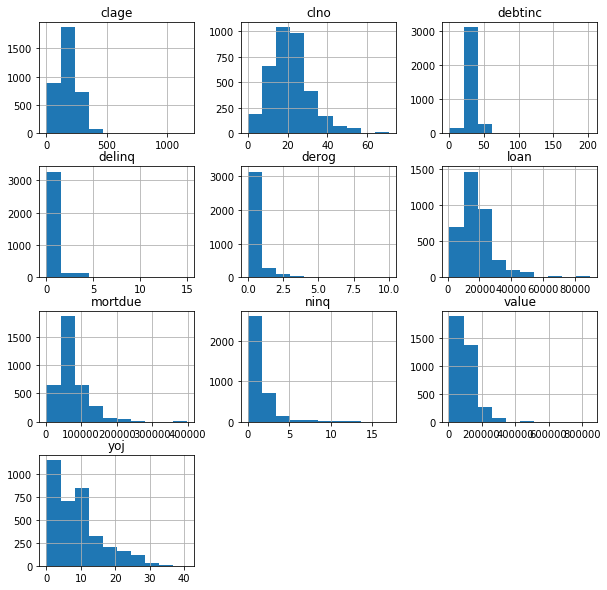

In [293]:
data.hist(figsize = (10,10));

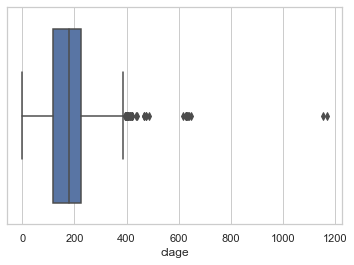

In [301]:
import seaborn as sns
sns.boxplot (x = data["clage"]);

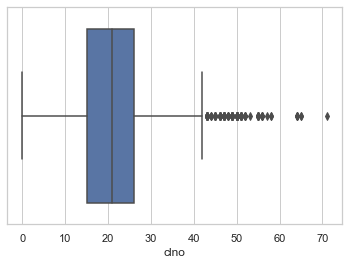

In [302]:
import seaborn as sns
sns.boxplot (x = data["clno"]);

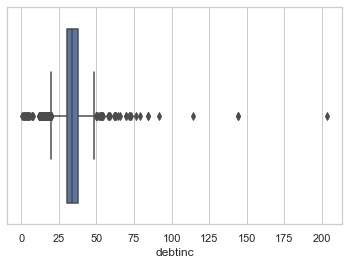

In [303]:
import seaborn as sns
sns.boxplot (x = data["debtinc"]);

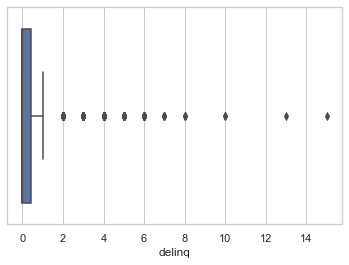

In [304]:
import seaborn as sns
sns.boxplot (x = data["delinq"]);

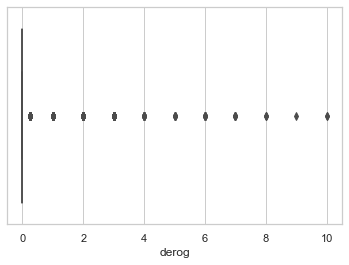

In [305]:
import seaborn as sns
sns.boxplot (x = data["derog"]);

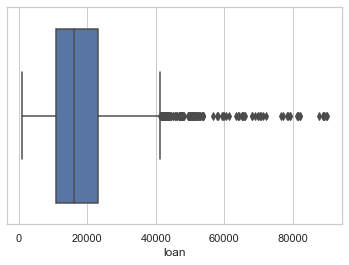

In [306]:
import seaborn as sns
sns.boxplot (x = data["loan"]);

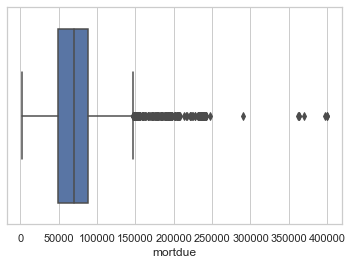

In [307]:
import seaborn as sns
sns.boxplot (x = data["mortdue"]);

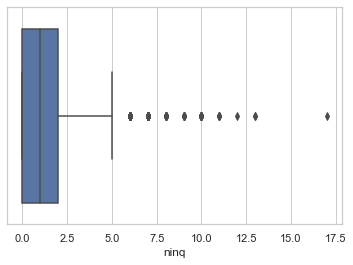

In [308]:
import seaborn as sns
sns.boxplot (x = data["ninq"]);

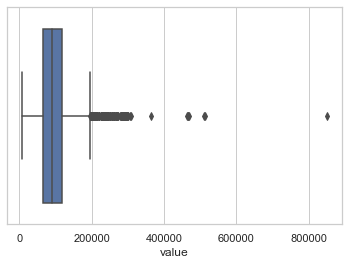

In [309]:
import seaborn as sns
sns.boxplot (x = data["value"]);

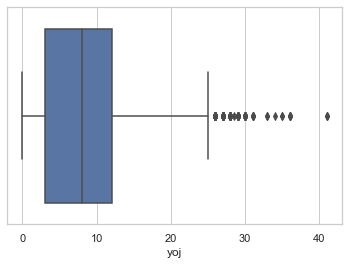

In [310]:
import seaborn as sns
sns.boxplot (x = data["yoj"]);

## K-Means Model ve Görselleştirme

In [312]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [313]:
k_fit = kmeans.fit(data)

In [314]:
k_fit.n_clusters

4

In [315]:
k_fit.cluster_centers_

array([[1.82769863e+04, 7.46802948e+04, 1.04310856e+05, 8.55687673e+00,
        2.47022103e-01, 4.26482956e-01, 1.78991370e+02, 1.12727651e+00,
        2.28140398e+01, 3.43052271e+01],
       [3.29731481e+04, 2.11977212e+05, 2.82407009e+05, 7.93267137e+00,
        1.07129835e-01, 3.70370370e-01, 2.16778889e+02, 1.24356124e+00,
        2.91666667e+01, 3.61724304e+01],
       [2.35478927e+04, 1.26219913e+05, 1.70487827e+05, 8.72070861e+00,
        2.31082908e-01, 4.19085806e-01, 2.06609833e+02, 1.26488230e+00,
        2.63746165e+01, 3.54140015e+01],
       [1.59654778e+04, 4.49933856e+04, 6.03382393e+04, 9.20831527e+00,
        2.98038814e-01, 4.47779273e-01, 1.68567476e+02, 1.21270138e+00,
        1.79565266e+01, 3.26405987e+01]])

In [316]:
k_fit.labels_

array([0, 0, 3, ..., 0, 3, 3])

In [322]:
## iki boyutlu gösterebilmek için iki değişken aldık.

In [317]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(data)

In [318]:
kumeler = k_fit.labels_

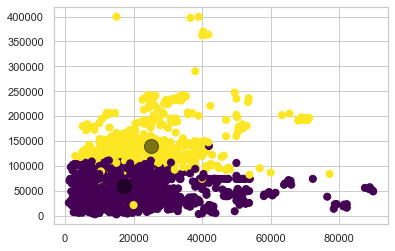

In [331]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = kumeler, s =50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [332]:
## 3 boyutlu görselleştirme yapıyoruz.

In [320]:
from mpl_toolkits.mplot3d import Axes3D

In [321]:
!pip install --upgrade matplotlib
import mpl_toolkits

  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Erişim engellendi: 'c:\\users\\user\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [333]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(data)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

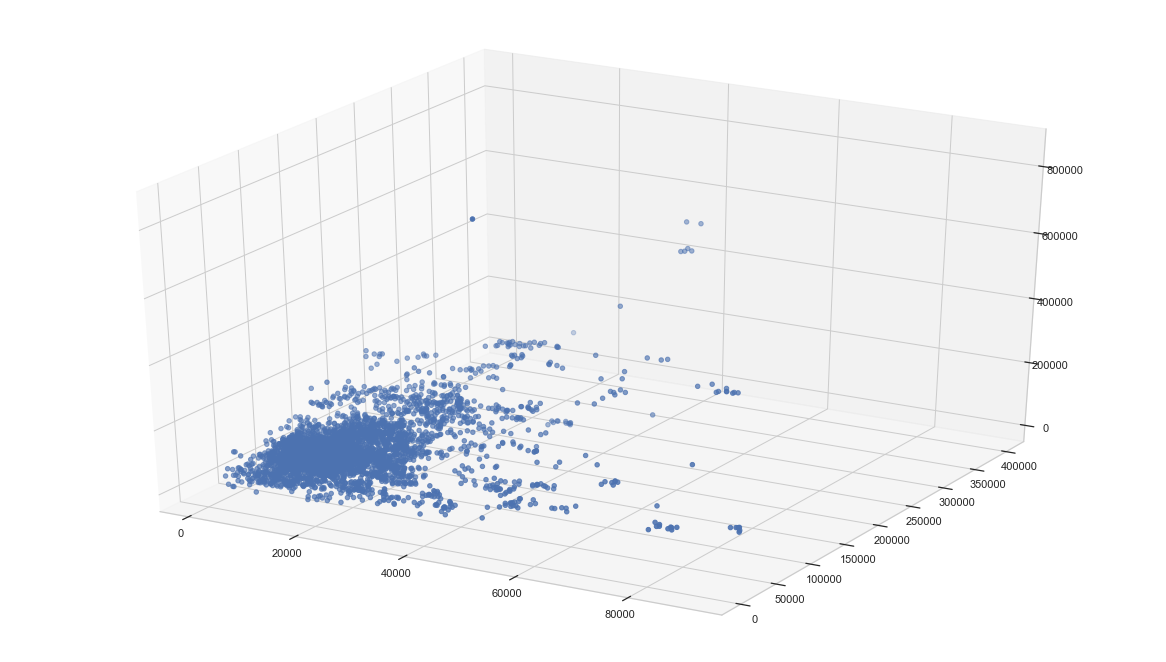

In [341]:
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2]);

In [337]:
# Merkezlerin gösterimi

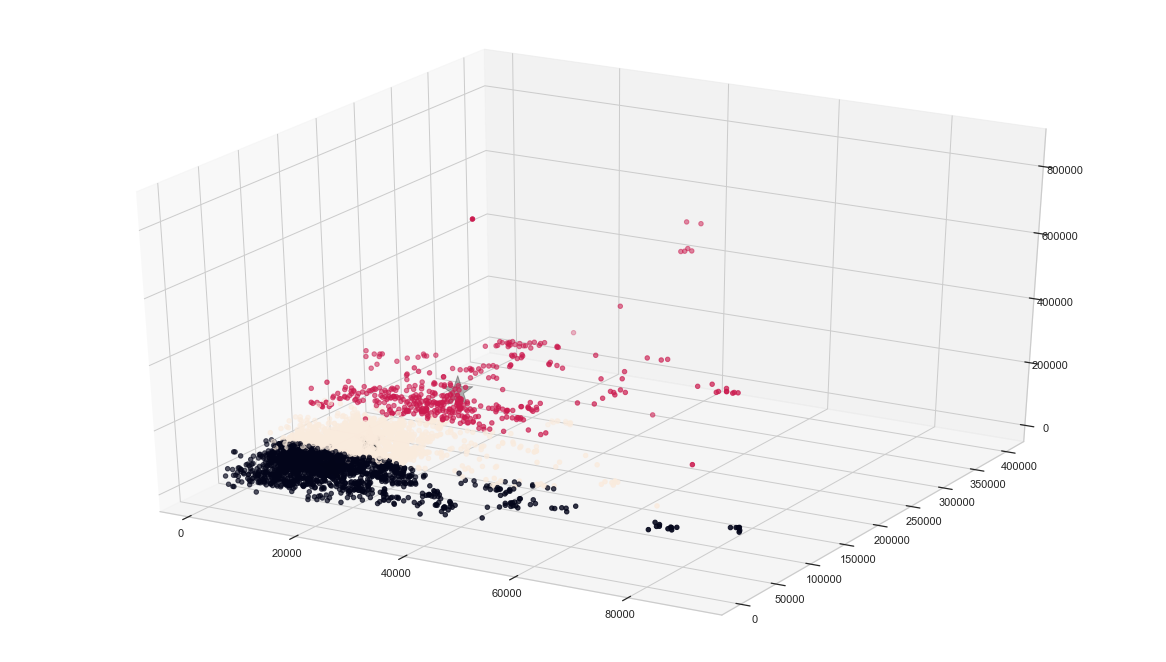

In [343]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c = kumeler)
ax.scatter(merkezler[:,0], merkezler[:,1], merkezler[:,2],
          marker = '*',
          c = '#050505',
          s = 1000);

In [344]:
# Kumeler ve gozlem birimleri

In [346]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(data)
kumeler = k_fit.labels_

In [349]:
pd.DataFrame({"hedef değişken" : data.index, "Kumeler": kumeler})[0:5]

,hedef değişken,Kumeler
0,0,0
1,0,2
2,0,0
3,0,0
4,0,0


In [350]:
data["kume_no"] = kumeler

In [351]:
data.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,kume_no
bad,,,,,,,,,,,
0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042,0
0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479,2
0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354,0
0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992,0
0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327,0


## Hiyerarşik Kümeleme

In [359]:
data.index = data.iloc[:,0]
data = data.iloc[:,1:11]
data.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,,,,,,,,,,
0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [360]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(data, "complete")
gc_average = linkage(data, "average")
hc_single = linkage(data, "single")

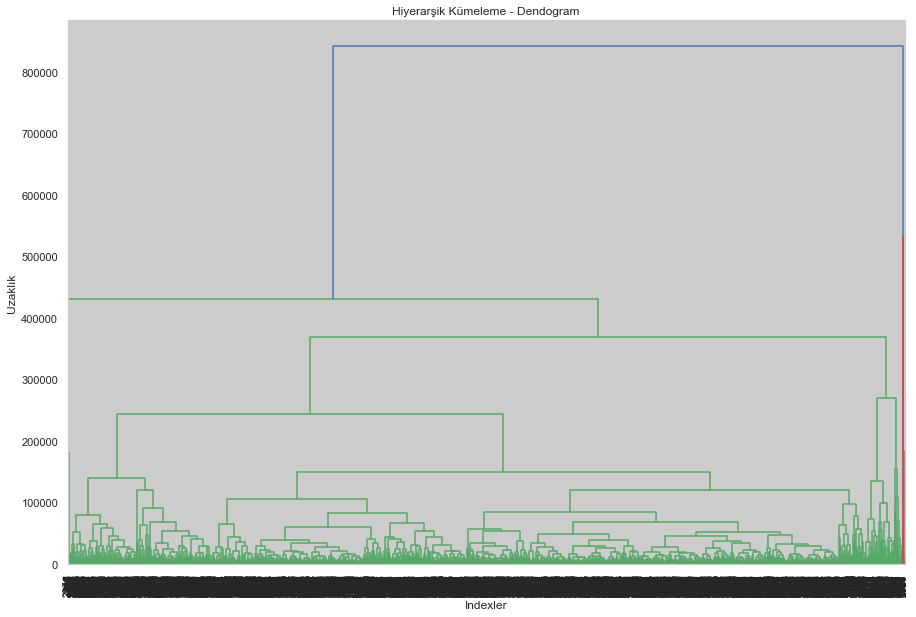

In [363]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete,
          leaf_font_size = 10);

In [364]:
# Burada dört grup yapıyoruz

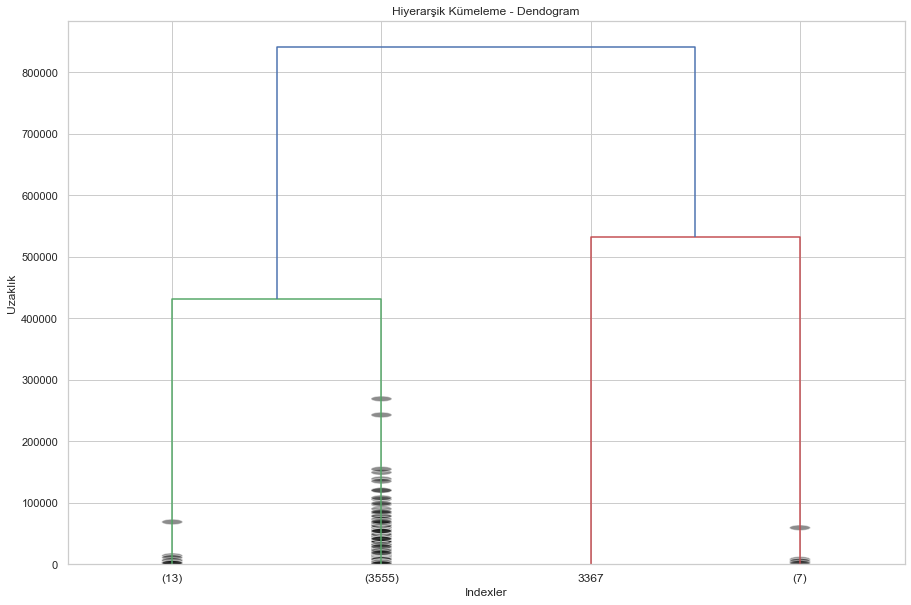

In [362]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete,
          truncate_mode = 'lastp',
          p = 4,
          show_contracted = True);

In [367]:
# Her biri bizim gözlemimizin ait olduğu etiketi gösteriyor.

In [366]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3,
                       affinity = "euclidean",
                       linkage = "ward")
cluster.fit_predict(data)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [368]:
pd.DataFrame({"hedef değişken" : data.index, "Kumeler": cluster.fit_predict(data)})[0:10]

,hedef değişken,Kumeler
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,1
9,0,0


In [369]:
data["kume_no"] = cluster.fit_predict(data)

In [370]:
data.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,kume_no
bad,,,,,,,,,,,
0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042,0
0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479,1
0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354,0
0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992,0
0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327,0


## KNN

In [378]:
y = data["bad"]
X = data.drop(["bad"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [379]:
from sklearn.neighbors import KNeighborsClassifier

In [380]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [381]:
y_pred = knn_model.predict(X_test)

In [382]:
accuracy_score(y_test, y_pred)

0.8131991051454138

In [383]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       743
           1       0.36      0.14      0.20       151

    accuracy                           0.81       894
   macro avg       0.60      0.54      0.55       894
weighted avg       0.76      0.81      0.78       894



## Model Tuning

In [384]:
knn_params = {"n_neighbors": np.arange(1,40)}

In [385]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [386]:
print(" en iyi skor:" + str(knn_cv.best_score_))
print(" en iyi parametreler:" + str(knn_cv.best_params_))

 en iyi skor:0.804628807634689
 en iyi parametreler:{'n_neighbors': 22}


In [387]:
knn = KNeighborsClassifier(22)
knn_tuned = knn.fit(X_train, y_train)

In [388]:
knn_tuned.score (X_test, y_test)

0.8411633109619687

In [390]:
y_pred = knn_tuned.predict(X_test)

In [391]:
accuracy_score(y_test, y_pred)

0.8411633109619687

In [392]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       743
           1       0.85      0.07      0.13       151

    accuracy                           0.84       894
   macro avg       0.84      0.54      0.52       894
weighted avg       0.84      0.84      0.78       894

